QUESTION 1

Occupations

Step 1. Import the necessary libraries


Step 2. Import the dataset from this address.


Step 3. Assign it to a variable called users

In [97]:
import pandas as pd
import numpy as np

In [98]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|',lineterminator='\n')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [101]:
users[["occupation","age"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [104]:
user_df=pd.DataFrame(users)
user_df
result = user_df.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

sum_sex = result[['F', 'M']].sum(axis=1)

result['MaleRatio'] = result['M'] / sum_sex*100
result.sort_values('MaleRatio',axis=0,ascending=False)

The male ratio per occcupation is: 


gender,F,M,MaleRatio
occupation,,,
doctor,0,7,100.000000
engineer,2,65,97.014925
technician,1,26,96.296296
retired,1,13,92.857143
programmer,6,60,90.909091
executive,3,29,90.625000
scientist,3,28,90.322581
entertainment,2,16,88.888889
lawyer,2,10,83.333333


Step 6. For each occupation, calculate the minimum and maximum ages



In [105]:
Min_Age = pd.Series(users.groupby(['occupation'])['age'].min())

Max_Age = pd.Series(users.groupby(['occupation'])['age'].max())

Min_Max = pd.DataFrame({'Minimum Age':Min_Age, 'Maximum Age':Max_Age})

Min_Max

,Minimum Age,Maximum Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age


In [106]:
meanage = pd.pivot_table(users,index=['occupation'], columns= ['gender'], values = 'age',   aggfunc={'age' : np.mean}).fillna(0)
meanage


gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,0.000000,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


Step 8. For each occupation present the percentage of women and men

In [107]:
percentage = pd.pivot_table(users,index=['occupation'],  columns = ["gender"] ,values = 'age',   aggfunc='count').fillna(0)

percentage['%male'] = (percentage['M']/(percentage['F']+ percentage['M'])*100)

percentage['%female'] = (percentage['F']/(percentage['F']+ percentage['M'])*100)

percentage.iloc[:,[2,3]]

gender,%male,%female
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


Question 2

Euro Teams


Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

In [2]:
import pandas as pd
import numpy as np

In [4]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [9]:
euro12[["Goals"]]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


Step 5. How many team participated in the Euro2012?

In [16]:
teams = euro12.Team.count()
print("Number of teams participated in EURO2012 is {}".format(teams))

Number of teams participated in EURO2012 is 16


Step 6. What is the number of columns in the dataset?


In [17]:
len(euro12.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline


In [19]:
discipline = pd.DataFrame().assign(Team=euro12['Team'],Yellow_Cards=euro12['Yellow Cards'], Red_Cards = euro12['Red Cards'])
discipline

,Team,Yellow_Cards,Red_Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards


In [20]:
discpline.sort_values(['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [109]:
euro12["Yellow Cards"].mean()

7.4375

Step 10. Filter teams that scored more than 6 goalsStep

In [111]:
euro12[euro12["Goals"]>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


11. Select the teams that start with G

In [23]:
euro12[euro12.Team.str.startswith('G')]["Team"]

5    Germany
6     Greece
Name: Team, dtype: object

Step 12. Select the firs 7 columns


In [24]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [25]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [26]:
teams = euro12[(euro12.Team == "England") | (euro12.Team == "Italy") | (euro12.Team == "Russia")]
accuracy = teams[["Team","Shooting Accuracy"]]
accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


QUESTION 3

Housing


Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

In [118]:
import pandas as pd
import numpy as np




series1 = pd.Series(np.random.randint(1,4, size=100))

series2 =  pd.Series(np.random.randint(1,3, size=100))

series3 =  pd.Series(np.random.randint(10000,30000, size=100))

Step 3. Create a DataFrame by joinning the Series by column

In [28]:
dataFrame1 = pd.concat([series1, series2, series3], axis = 1)
dataFrame1

,0,1,2
0,1,1,26193
1,3,2,16892
2,3,1,19585
3,2,1,22343
4,1,2,27746
...,...,...,...
95,1,1,22810
96,3,2,29141
97,3,1,17585
98,3,2,24905


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [29]:
dataFrame1.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
dataFrame1.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,26193
1,3,2,16892
2,3,1,19585
3,2,1,22343
4,1,2,27746


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'


In [30]:
bigcolumn = pd.concat([series1,series2,series3],axis=0)
bigcolumn

0         1
1         3
2         3
3         2
4         1
      ...  
95    22810
96    29141
97    17585
98    24905
99    20387
Length: 300, dtype: int32

Step 6. Ops it seems it is going only until index 99. Is it true?


YES

Step 7. Reindex the DataFrame so it goes from 0 to 299


In [31]:
bigcolumn.index = range(300)
bigcolumn

0          1
1          3
2          3
3          2
4          1
       ...  
295    22810
296    29141
297    17585
298    24905
299    20387
Length: 300, dtype: int32

QUESTION 4

Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

In [34]:
import pandas as pd
import numpy as np
import csv
import datetime

In [35]:
data = pd.read_table("wind.txt",sep = '\s+',  index_col = False,lineterminator='\n')

data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL\r
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04\r
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83\r
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71\r
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88\r
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08\r
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46\r
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58\r
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79\r


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.

In [36]:
data = pd.read_table("wind.txt",sep = '\s+',  index_col = False,lineterminator='\n',parse_dates = [[0,1,2]])

data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL\r
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04\r
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83\r
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71\r
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88\r
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08\r
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46\r
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58\r
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79\r


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

In [37]:
def fixYears(var):
    if var.year > 1979:
        year=var.year-100
    else:
        year = var.year
    return datetime.date(year,var.month,var.day)

In [38]:
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(fixYears)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL\r
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04\r
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83\r
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71\r
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88\r
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83\r


Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].

In [39]:
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL\r
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04\r
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83\r
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71\r
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88\r
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83\r


Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

In [40]:
data.isnull().sum()

RPT      6
VAL      3
ROS      2
KIL      5
SHA      2
BIR      0
DUB      3
CLA      2
MUL      3
CLO      1
BEL      0
MAL\r    0
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [45]:
data.notnull().sum()

RPT      6568
VAL      6571
ROS      6572
KIL      6569
SHA      6572
BIR      6574
DUB      6571
CLA      6572
MUL      6571
CLO      6573
BEL      6574
MAL\r    6574
dtype: int64

In [46]:
data.notnull().values.ravel().sum()

78861

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.

In [47]:
x = data.mean()
y = x.mean()
print("Mean of means of windspeed :")
y

Mean of means of windspeed :


9.73970083476385

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.

In [48]:
locs = data.iloc[:, 1:]
loc_stats = pd.concat([locs.min(), locs.max(), locs.mean(), locs.std()], axis = 1)
loc_stats = loc_stats.rename({0: "Minimum", 1 : "Maximum", 2 : "Mean", 3 : "Standard Deviation"}, axis = 1)
loc_stats

,Minimum,Maximum,Mean,Standard Deviation
VAL,0.21,33.37,10.644314,5.267356
ROS,1.5,33.84,11.660526,5.008450
KIL,0.0,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.0,26.16,7.092254,3.968683
DUB,0.0,30.37,9.797343,4.977555
CLA,0.0,31.08,8.495053,4.499449
MUL,0.0,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954
BEL,0.13,42.38,13.121007,5.835037


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.


In [52]:
daily = pd.DataFrame()


daily['min'] = data.min(axis = 1)
daily['max'] = data.max(axis = 1)
daily['mean'] = data.mean(axis = 1) 
daily['std'] = data.std(axis = 1) 
daily

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,12.816000,2.875205
1961-01-02,6.50,17.54,11.087000,3.246482
1961-01-03,6.17,18.50,11.535000,3.863068
1961-01-04,1.79,11.75,6.231818,3.044716
1961-01-05,6.17,13.33,10.520909,2.533900
...,...,...,...,...
1978-12-27,8.08,17.62,14.583636,2.916852
1978-12-28,5.00,21.79,12.758182,5.265504
1978-12-29,8.71,19.17,13.554545,3.593590


Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January

In [53]:
jan_avg_windspeed = data[data.index.month == 1]
jan_avg_windspeed.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location

In [54]:
data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
Yr_Mo_Dy,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233


Step 13. Downsample the record to a monthly frequency for each location.


In [55]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
Yr_Mo_Dy,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323
...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774


Step 14. Downsample the record to a weekly frequency for each location.


In [56]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
Yr_Mo_Dy,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000
...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks

In [58]:
weeks = data.resample('W').agg(['min','max','mean','std'])
weeks.loc[weeks.index[1:53], "RPT":"MAL"] .head(5)

RPT                               VAL                    \
              min    max       mean       std   min    max       mean   
Yr_Mo_Dy                                                                
1961-01-08  10.58  18.50  13.541429  2.631321  6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392  3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402  3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061  9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408  9.46  24.21  15.460000   

                        ROS         ...        BIR             DUB         \
                 std    min    max  ...       mean       std   min    max   
Yr_Mo_Dy                            ...                                     
1961-01-08  3.949525   7.62  12.33  ...   6.435714  2.059546  8.63  14.29   
1961-01-15  3.148945   7.08  19.50  ...   5.072857  3.251039  2.50  15.54   
1961-01-22  3.837785   7.29  20.79  ...   7.417143  3.453432  3.17  17.83   
1961-01-29  5.170224  12.67  25.84  ...  14.828571  3.749415  9.25  22.00   
1961-02-05  5.187395   9.04  19.70  ...   9.107143  2.397066  8.50  14.88   

                                  CLA                              
                 mean       std   min    max       mean       std  
Yr_Mo_Dy                                                           
1961-01-08  11.061429  1.872222  1.79  10.04   6.616667  3.098404  
1961-01-15   7.535714  4.709309  0.58  11.50   6.820000  3.936894  
1961-01-22   9.257143  5.166300  2.79  11.38   7.875714  3.164990  
1961-01-29  15.528571  4.508449  8.71  20.25  15.160000  4.436222  
1961-02-05  12.204286  2.423454  3.63  15.54   8.548571  4.081158  

[5 rows x 32 columns]

Question 5

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries



In [59]:
import pandas as pd
import numpy as np

In [60]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t',lineterminator='\n')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?




In [61]:
chipo.size

23110

Step 6. What is the number of columns in the dataset?


In [62]:
chipo.columns.size

5

Step 7. Print the name of all the columns




In [63]:
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


Step 8. How is the dataset indexed?



In [64]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?


In [65]:
number_ordered_items = chipo.groupby("item_name").agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False)
most_ordered_item = number_ordered_items[:1]
most_ordered_item

,quantity
item_name,
Chicken Bowl,761


Step 10. For the most-ordered item, how many items were ordered?



In [66]:
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

Step 11. What was the most ordered item in the choice_description column?


In [67]:
chipo.groupby("choice_description").agg({'quantity':'sum'}).sort_values('quantity',ascending=False).head(1)

,quantity
choice_description,
[Diet Coke],159


Step 12. How many items were orderd in total?

In [68]:
chipo.quantity.sum()

4972

Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type


In [69]:
chipo.item_price.dtype

dtype('O')

In [70]:
fn = lambda price : float(price[1:-1])
item_price = chipo.item_price.apply(fn)
item_price.dtype

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [73]:
(item_price*chipo.quantity).sum()

39237.02

Step 15. How many orders were made in the period?

In [74]:
chipo.order_id.value_counts().count()

1834

Step 16. What is the average revenue amount per order?



In [77]:
chipo['revenue'] = chipo['quantity'] * item_price
avg_per_order = chipo.groupby(by=['order_id']).sum()
avg_per_order['revenue'].mean()

21.394231188658654

Step 17. How many different items are sold?





In [78]:
chipo.item_name.value_counts().count()

50

Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

Don't forget to label your axes!


Text(0, 0.5, 'Number of marriages & divorces per capita')

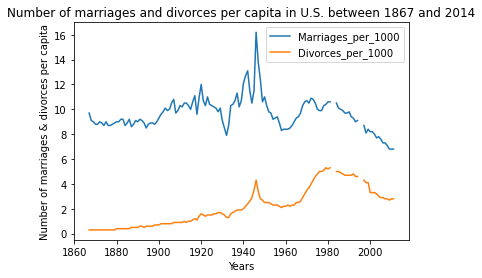

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
columns = ["Marriages_per_1000","Divorces_per_1000"]
x_data = data['Year'].values
fig ,ax = plt.subplots()

for col in columns:
    ax.plot(x_data,data[col].values)

ax.set_title("Number of marriages and divorces per capita in U.S. between 1867 and 2014")
ax.legend(columns)

plt.xlabel("Years")
plt.ylabel("Number of marriages & divorces per capita")

Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Don't forget to label your axes!



Text(0.5, 0, 'Years')

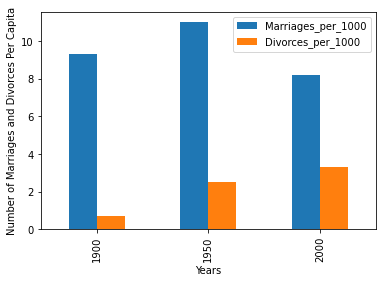

In [81]:
import pandas as pd


df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
data = df[(df.Year == 1900) | (df.Year == 1950) | (df.Year == 2000)]
line = data.plot.bar(x = 'Year', y = ['Marriages_per_1000', 'Divorces_per_1000'])
line.set_ylabel("Number of Marriages and Divorces Per Capita")
line.set_xlabel("Years")

Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.

Don't forget to label your axes!

Text(0.5, 1.0, 'Actors by thier kills')

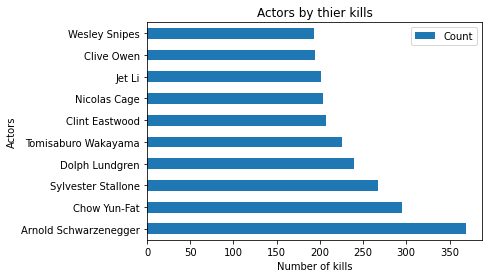

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("actor_kill_counts.csv")
df = df.sort_values(by = "Count", ascending = False)

line = df.plot.barh(x = "Actor")
line.set_ylabel("Actors")
line.set_xlabel("Number of kills")
line.set_title("Actors by thier kills")



Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.


In [112]:
import numpy as np
import matplotlib.pyplot as plt

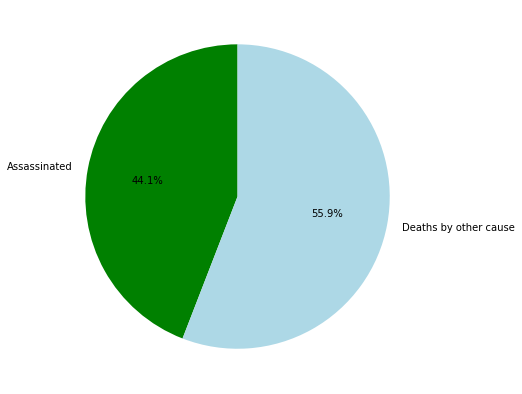

In [115]:

roman_data = pd.read_csv('roman-emperor-reigns.csv')
assasinated = roman_data[roman_data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
chart = plt.figure(figsize =(10, 7))
colors=['green', 'lightblue']
plt.pie([len(assasinated),len(roman_data) - len(assasinated)], labels = ['Assassinated', 'Deaths by other cause'],  colors=colors, startangle=90, autopct='%1.1f%%')
 

plt.show()

Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!

Color each dot according to its year.



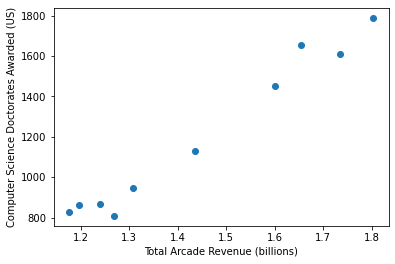

In [117]:
import numpy as np
import matplotlib.pyplot as plt
rev_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
#rev_data.head()

arcrev = rev_data['Total Arcade Revenue (billions)'].values
csdoc = rev_data['Computer Science Doctorates Awarded (US)'].values
plt.scatter(arcrev, csdoc)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.show()
